In [10]:
import pandas as pd

In [8]:
#Loading 4.1
df = pd.read_csv('https://raw.githubusercontent.com/happy522/ChatGPT-as-a-CAT-tool-in-Easy-language-translation_2025/refs/heads/main/Holistic%20and%20Linguistic%20Data%20GPT-4.1.csv')

#Loading 4.0
#df = pd.read_csv('https://raw.githubusercontent.com/happy522/ChatGPT-as-a-CAT-tool-in-Easy-language-translation_2025/refs/heads/main/Holistic%20and%20Linguistic%20Data%20GPT-4.0.csv')

In [9]:
df

,ID,Text,Holistic,Linguistic
0,BN_10B,"Eltern, die in der Stadt Hildesheim ihren Wohn...",Hier ist der Text in Deutscher Leichter Sprach...,Hier ist der Text nach Ihren Vorgaben:\r\n\r\n...
1,BN_1B,BAföG (für Schüler)\r\n_______________________...,Hier ist der Text in Leichter Sprache:\r\n\r\n...,"Gern, hier ist der Text nach Ihren Vorgaben re..."
2,BN_2B,Fundsachen\r\n________________________________...,Hier ist der Text in Leichter Sprache:\r\n\r\n...,"Gerne, hier die Überarbeitung entsprechend Ihr..."
3,BN_3B,"Kindertagesstätte, Platzvermittlung und Voranm...",Hier ist der Text in Leichter Sprache:\r\n\r\n...,"Hier ist der vereinfachte Text, der Ihren Anfo..."
4,BN_4B,Allgemeine Informationen \r\nSie sind aus Ihre...,Hier ist der Text in Leichter Sprache:\r\n\r\n...,Gerne! Hier ist der Text nach Ihren Vorgaben (...
5,BN_5B,Elterngeld und Elternzeit\r\n_________________...,Gerne! Hier ist der Text in Deutscher Leichter...,"Gerne, hier ist der Text weiter vereinfacht au..."
6,BN_6B,Führungszeugnis \r\n__________________________...,Hier ist der Text in Leichter Sprache:\r\n\r\n...,"Hier ist der Text, nach Ihren Vorgaben (verein..."
7,BN_7B,Zweitwohnungssteuer \r\n______________________...,Gerne! Hier ist der Text in Deutscher Leichter...,Das ist eine gute Übersetzung in Leichte Sprac...
8,BN_8B,Anmeldung einer Eheschliessung \r\nDie beabsic...,Hier ist der Text in Leichter Sprache:\r\n\r\n...,"Natürlich! Hier ist der Text, wie von Ihnen ge..."
9,BN_9B,Eintragung in das Wählerverzeichnis zur Landta...,Hier ist der Text in Deutscher Leichter Sprach...,Gerne! Hier ist der Text in stark vereinfachte...


In [10]:
!python -m spacy download de_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 47.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [13]:
import pandas as pd
import spacy

# Load German spaCy model
nlp = spacy.load("de_core_news_sm")

df.rename(columns={ "Text": "Original"}, inplace=True)

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_readability_scores(df, metric_prefix,name, output_dir="plots"):
    """
    Creates and saves a boxplot for readability metrics.

    Parameters:
    - df: pandas DataFrame containing readability columns.
    - metric_prefix: string prefix like "Fog" or "FRE".
    - output_dir: directory where the plot will be saved (default: "plots").

    """
    # Define columns
    metric_cols = [f"{metric_prefix}_Original", f"{metric_prefix}_Holistic", f"{metric_prefix}_Linguistic"]

    # Check if all columns exist
    for col in metric_cols:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")

    # Melt for seaborn
    df_melted = df.melt(value_vars=metric_cols,
                        var_name="Metric",
                        value_name="Score")

    # Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_melted, x="Metric", y="Score", hue="Metric", palette="pastel", legend=False)

    plt.title(f"{name} Comparison")
    plt.ylabel("Score")
    plt.xlabel("Text Type")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()

    plt.show()


    # Save
    os.makedirs(output_dir, exist_ok=True)
    file_path = os.path.join(output_dir, f"{name}_readability_boxplot.png")
    plt.savefig(file_path, dpi=300)
    plt.close()

    print(f"Plot saved to: {file_path}")


# Lexical Measures

### TTR (Type-Token Ratio)

A **lexical measure** used to assess the **diversity of vocabulary** in a text.

---

### **How it works:**

* **Types** = unique words in the text
* **Tokens** = total number of words (including repetitions)

**Formula:**

$$
\text{TTR} = \frac{\text{Number of Unique Words (Types)}}{\text{Total Number of Words (Tokens)}}
$$

---

### Example:

Text: `"Der Hund läuft und der Hund bellt."`

* **Tokens** = 7 (Der, Hund, läuft, und, der, Hund, bellt)
* **Types** = 5 (Der, Hund, läuft, und, bellt)
* **TTR** = 5 / 7 ≈ **0.714**

If a text has a **higher TTR**, it means:

* More varied vocabulary (greater lexical richness)

A **lower TTR** means:

* Repetition or simpler, limited vocabulary


        ID  TTR_Original  TTR_Holistic  TTR_Linguistic
0   BN_10B         0.601         0.473           0.623
1    BN_1B         0.673         0.485           0.519
2    BN_2B         0.545         0.524           0.522
3    BN_3B         0.635         0.514           0.648
4    BN_4B         0.591         0.486           0.588
5    BN_5B         0.512         0.470           0.629
6    BN_6B         0.487         0.458           0.686
7    BN_7B         0.581         0.479           0.795
8    BN_8B         0.547         0.496           0.579
9    BN_9B         0.407         0.369           0.454
10   K_10B         0.614         0.511           0.672
11    K_1B         0.539         0.525           0.587
12    K_2B         0.494         0.453           0.538
13    K_3B         0.508         0.457           0.653
14    K_4B         0.599         0.500           0.635
15    K_5B         0.565         0.534           0.633
16    K_6B         0.468         0.429           0.611
17    K_7B

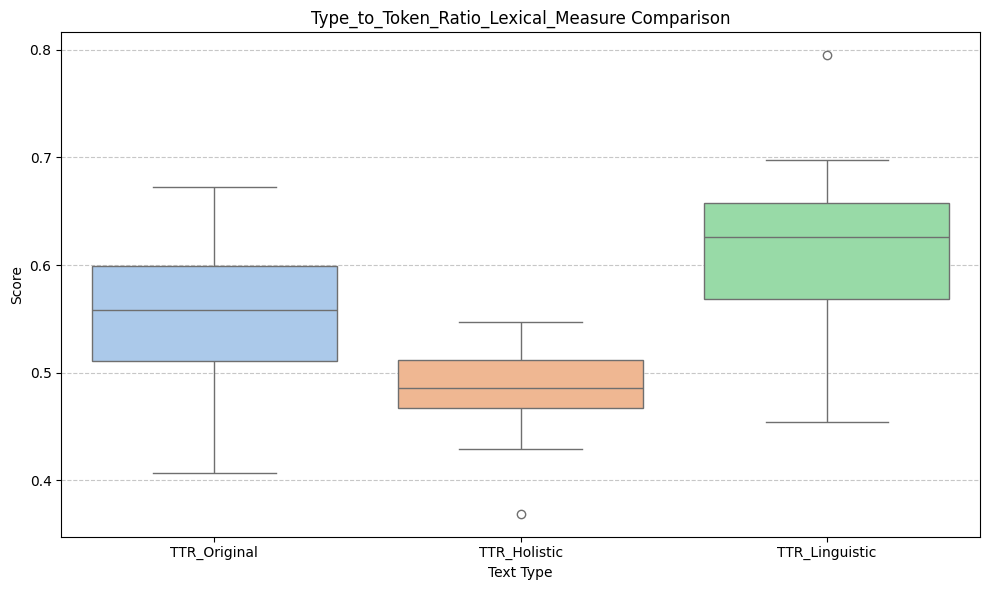

Plot saved to: plots/Type_to_Token_Ratio_Lexical_Measure_readability_boxplot.png


In [18]:
def compute_ttr(text):
    doc = nlp(text)
    words = [token.text.lower() for token in doc if token.is_alpha]

    total_tokens = len(words)
    unique_types = len(set(words))

    if total_tokens == 0:
        return 0.0
    return round(unique_types / total_tokens, 3)
df["TTR_Original"] = df["Original"].apply(compute_ttr)
df["TTR_Holistic"] = df["Holistic"].apply(compute_ttr)
df["TTR_Linguistic"] = df["Linguistic"].apply(compute_ttr)

print(df[["ID", "TTR_Original", "TTR_Holistic", "TTR_Linguistic"]])
plot_readability_scores(df, "TTR" ,"Type_to_Token_Ratio_Lexical_Measure",output_dir="plots")



### Lexical Density

A **lexical measure** that indicates the **proportion of content words** (nouns, verbs, adjectives, adverbs) relative to all words in a text.

---

### **How it works:**

* **Content Words** = nouns, main verbs, adjectives, adverbs
* **Total Words** = all words in the text (including function words like articles, pronouns, prepositions, conjunctions)

**Formula:**

$$
\text{Lexical Density} = \frac{\text{Number of Content Words}}{\text{Total Number of Words}}
$$

---

### Example:

Text: `"Der kleine Hund bellt laut im Garten."`

* **Tokens** = 7 (Der, kleine, Hund, bellt, laut, im, Garten)
* **Content Words** = 5 (kleine, Hund, bellt, laut, Garten)
* **Lexical Density** = 5 / 7 ≈ **0.714**

A **higher lexical density** means:

* More informational content (text is more content-heavy)

A **lower lexical density** means:

* Text is more function-heavy (simpler, more conversational or explanatory)


        ID  LD_Original  LD_Holistic  LD_Linguistic
0   BN_10B        0.508        0.489          0.548
1    BN_1B        0.497        0.446          0.553
2    BN_2B        0.494        0.471          0.482
3    BN_3B        0.453        0.368          0.444
4    BN_4B        0.494        0.446          0.504
5    BN_5B        0.500        0.533          0.551
6    BN_6B        0.501        0.455          0.533
7    BN_7B        0.480        0.530          0.628
8    BN_8B        0.519        0.491          0.568
9    BN_9B        0.458        0.428          0.411
10   K_10B        0.550        0.521          0.542
11    K_1B        0.524        0.504          0.481
12    K_2B        0.522        0.497          0.492
13    K_3B        0.529        0.499          0.565
14    K_4B        0.507        0.500          0.547
15    K_5B        0.497        0.530          0.500
16    K_6B        0.486        0.464          0.525
17    K_7B        0.478        0.442          0.433
18    K_8B  

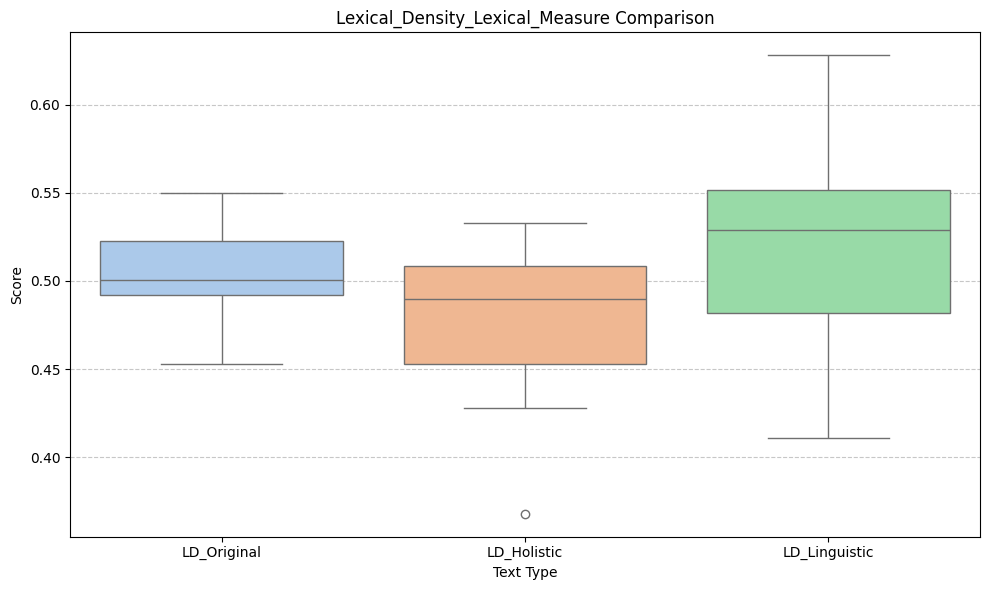

Plot saved to: plots/Lexical_Density_Lexical_Measure_readability_boxplot.png


In [19]:

def compute_lexical_density(text):
    doc = nlp(text)
    words = [token for token in doc if token.is_alpha]

    total_words = len(words)
    content_words = [token for token in words if token.pos_ in {"NOUN", "VERB", "ADJ", "ADV"}]

    if total_words == 0:
        return 0.0
    return round(len(content_words) / total_words, 3)

df["LD_Original"] = df["Original"].apply(compute_lexical_density)
df["LD_Holistic"] = df["Holistic"].apply(compute_lexical_density)
df["LD_Linguistic"] = df["Linguistic"].apply(compute_lexical_density)

print(df[["ID", "LD_Original", "LD_Holistic", "LD_Linguistic"]])
plot_readability_scores(df, "LD","Lexical_Density_Lexical_Measure", output_dir="plots")




### Word Rarity

A **lexical measure** used to assess the **uncommonness or frequency** of words in a text, based on a reference corpus or frequency list.

---

### **How it works:**

* Each word is compared to a frequency list from a large corpus - here spacy
* Words are classified as **common** or **rare** based on how often they appear in the language
* The proportion or count of **rare words** is used to measure lexical sophistication

---

### Example:

Text: `"Der Archäologe untersuchte das antike Artefakt."`

* **Tokens** = 7 (Der, Archäologe, untersuchte, das, antike, Artefakt)
* **Rare Words** = 3 (Archäologe, antike, Artefakt)
* **Word Rarity Score** = 3 / 7 ≈ **0.429**

A **higher word rarity score** means:

* The text contains more **unusual, domain-specific, or academic** vocabulary

A **lower word rarity score** means:

* The vocabulary is **more common**, suggesting the text is simpler and easier to understand



        ID  WR_Original  WR_Holistic  WR_Linguistic
0   BN_10B        0.488        0.427          0.452
1    BN_1B        0.526        0.424          0.536
2    BN_2B        0.448        0.414          0.419
3    BN_3B        0.445        0.368          0.426
4    BN_4B        0.482        0.401          0.469
5    BN_5B        0.458        0.465          0.479
6    BN_6B        0.492        0.408          0.504
7    BN_7B        0.480        0.401          0.500
8    BN_8B        0.494        0.424          0.464
9    BN_9B        0.446        0.410          0.390
10   K_10B        0.531        0.447          0.496
11    K_1B        0.535        0.450          0.427
12    K_2B        0.543        0.434          0.409
13    K_3B        0.531        0.439          0.444
14    K_4B        0.514        0.423          0.484
15    K_5B        0.465        0.409          0.483
16    K_6B        0.500        0.422          0.434
17    K_7B        0.472        0.416          0.438
18    K_8B  

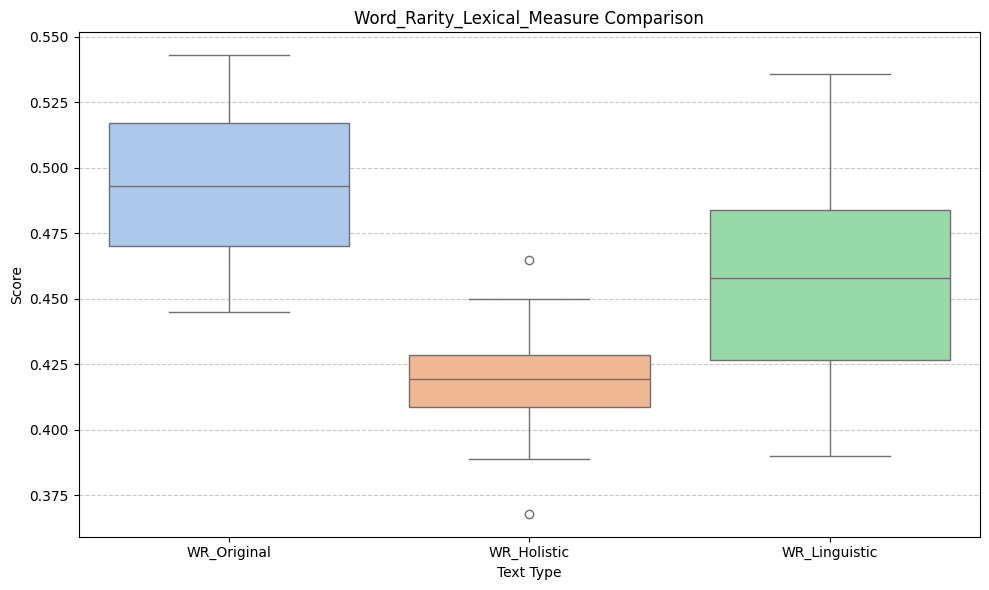

Plot saved to: plots/Word_Rarity_Lexical_Measure_readability_boxplot.png


In [22]:

def compute_word_rarity(text):
    doc = nlp(text)

    words = [token.text.lower() for token in doc if token.is_alpha]
    total_words = len(words)

    # Heuristic: rare words = not in vocab or appear very infrequently in the model
    rare_words = [
        word for word in words
        if not nlp.vocab[word].has_vector and not nlp.vocab[word].is_stop
    ]

    if total_words == 0:
        return 0.0
    return round(len(rare_words) / total_words, 3)
df["WR_Original"] = df["Original"].apply(compute_word_rarity)
df["WR_Holistic"] = df["Holistic"].apply(compute_word_rarity)
df["WR_Linguistic"] = df["Linguistic"].apply(compute_word_rarity)

print(df[["ID", "WR_Original", "WR_Holistic", "WR_Linguistic"]])
plot_readability_scores(df, "WR","Word_Rarity_Lexical_Measure", output_dir="plots")


# Syntactic Measures

### MDD (Mean Dependency Distance)

A **syntactic measure** used to assess the **complexity of sentence structure** based on the average distance between dependent words and their heads.

---

### **How it works:**

* A **dependency distance** is the number of words between a **dependent** and its **head** in a syntactic dependency tree
* Only non-root and non-punctuation dependencies are counted
* The **average** of all these distances in a sentence is the **MDD**

**Formula:**

$$
\text{MDD} = \frac{\sum |\text{position}_{\text{head}} - \text{position}_{\text{dependent}}|}{\text{Number of dependencies}}
$$

---

### Example:

Text: `"Der Junge, der einen Hund hat, spielt im Garten."`

Syntactic dependencies (simplified):

* "Junge" → "spielt" (distance = 4)
* "der" → "Junge" (1)
* "einen" → "Hund" (1)
* "Hund" → "hat" (2)
* "hat" → "der" (2)
* "im" → "Garten" (1)
* "Garten" → "spielt" (3)

- **Total Dependencies Considered** = 7
- **Sum of Distances** = 4 + 1 + 1 + 2 + 2 + 1 + 3 = 14
- **MDD** = 14 / 7 = **2.0**

---

A **higher MDD** indicates:

* More **syntactically complex** structures (e.g., embedded clauses, distant relations)

A **lower MDD** suggests:

* **Simpler, more linear** sentence construction, often found in easy or plain language texts


        ID  MDD_Original  MDD_Holistic  MDD_Linguistic
0   BN_10B         3.421         2.549           1.928
1    BN_1B         3.150         2.147           2.861
2    BN_2B         3.071         2.581           2.276
3    BN_3B         2.292         2.073           1.716
4    BN_4B         2.802         2.749           2.513
5    BN_5B         2.447         2.376           1.721
6    BN_6B         2.847         2.130           2.364
7    BN_7B         3.122         2.388           2.368
8    BN_8B         2.801         2.947           2.498
9    BN_9B         2.338         2.394           2.315
10   K_10B         2.259         3.215           1.919
11    K_1B         2.565         2.542           2.082
12    K_2B         2.553         1.962           2.187
13    K_3B         2.488         2.548           2.248
14    K_4B         2.752         2.147           1.816
15    K_5B         2.717         2.368           2.051
16    K_6B         3.330         2.358           1.819
17    K_7B

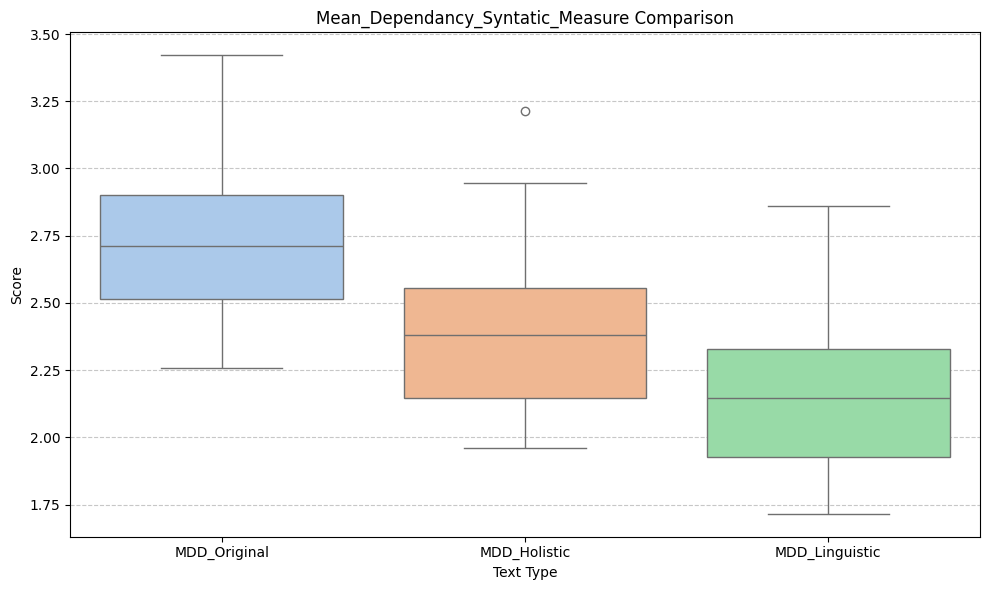

Plot saved to: plots/Mean_Dependancy_Syntatic_Measure_readability_boxplot.png


In [23]:
def compute_mdd(text):
    doc = nlp(text)
    distances = [
        abs(token.head.i - token.i)
        for token in doc
        if token.dep_ != "ROOT" and not token.is_punct
    ]
    if distances:
        return round(sum(distances) / len(distances), 3)
    else:
        return 0.0


# Compute MDD for each version
df["MDD_Original"] = df["Original"].apply(compute_mdd)
df["MDD_Holistic"] = df["Holistic"].apply(compute_mdd)
df["MDD_Linguistic"] = df["Linguistic"].apply(compute_mdd)

# Output results
print(df[["ID", "MDD_Original", "MDD_Holistic", "MDD_Linguistic"]])
plot_readability_scores(df, "MDD","Mean_Dependancy_Syntatic_Measure", output_dir="plots")

### Subordination Index

A **syntactic measure** used to assess the **complexity of sentence structure** by quantifying the use of subordinate clauses.

---

### **How it works:**

* Count the number of **finite verbs** in the text (each typically indicates a clause)
* Count how many of these occur in **subordinate clauses** (not the main/root clause)
* Calculate the **proportion** of subordinate clauses relative to all clauses

**Formula:**

$$
\text{Subordination Index} = \frac{\text{Number of Subordinate Clauses}}{\text{Total Number of Clauses (Finite Verbs)}}
$$

---

### Example:

Text: `"Der Mann, der das Auto fährt, ist mein Onkel."`

* **Finite verbs** = 2 (`fährt`, `ist`)
* **Subordinate clause** = 1 (`der das Auto fährt`)
* **Subordination Index** = 1 / 2 = **0.5**

---

A **higher subordination index** means:

* The text uses more **embedded/subordinate structures**, indicating **greater syntactic complexity**

A **lower subordination index** means:

* The text is **flatter**, using mostly **main clauses** (typical of easy or plain language)



        ID  SI_Original  SI_Holistic  SI_Linguistic
0   BN_10B        0.423        0.382          0.238
1    BN_1B        0.083        0.241          0.333
2    BN_2B        0.345        0.452          0.316
3    BN_3B        0.000        0.208          0.222
4    BN_4B        0.281        0.375          0.111
5    BN_5B        0.235        0.279          0.095
6    BN_6B        0.512        0.195          0.118
7    BN_7B        0.318        0.306          0.364
8    BN_8B        0.353        0.418          0.184
9    BN_9B        0.226        0.400          0.158
10   K_10B        0.214        0.375          0.105
11    K_1B        0.139        0.377          0.226
12    K_2B        0.185        0.312          0.400
13    K_3B        0.400        0.345          0.321
14    K_4B        0.515        0.340          0.217
15    K_5B        0.278        0.105          0.158
16    K_6B        0.411        0.333          0.179
17    K_7B        0.355        0.370          0.188
18    K_8B  

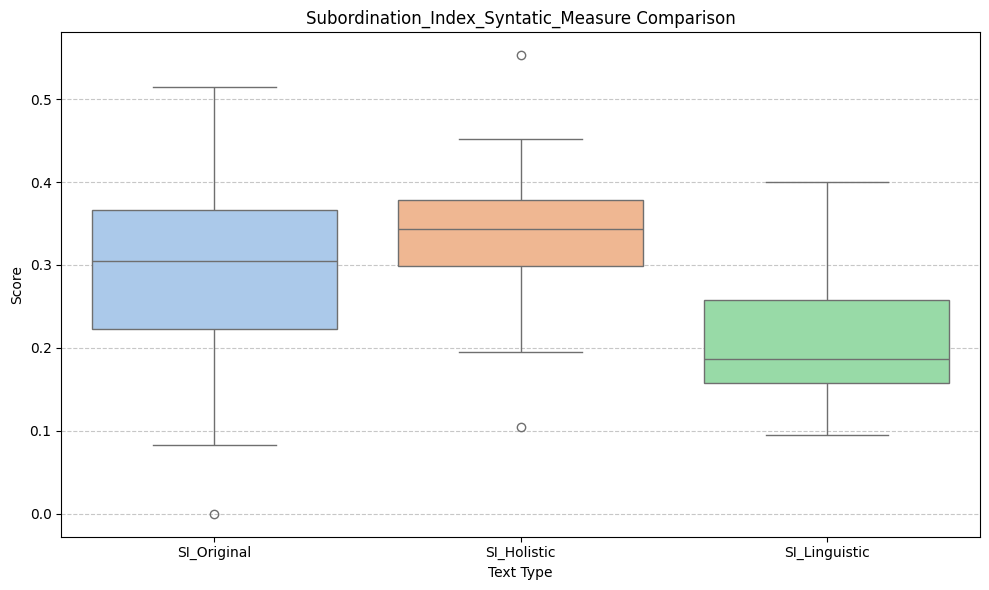

Plot saved to: plots/Subordination_Index_Syntatic_Measure_readability_boxplot.png


In [24]:
# Dependency labels often marking subordination in German
subordinate_labels = {"neb", "advcl", "ccomp", "xcomp", "acl", "relcl"}

def compute_subordination_index(text):
    doc = nlp(text)

    finite_verbs = [token for token in doc if token.pos_ in {"VERB", "AUX"} and "Fin" in token.morph.get("VerbForm")]

    total_clauses = len(finite_verbs)
    subordinate_clauses = sum(1 for token in finite_verbs if token.dep_ != "ROOT")

    if total_clauses == 0:
        return 0.0
    return round(subordinate_clauses / total_clauses, 3)

df["SI_Original"] = df["Original"].apply(compute_subordination_index)
df["SI_Holistic"] = df["Holistic"].apply(compute_subordination_index)
df["SI_Linguistic"] = df["Linguistic"].apply(compute_subordination_index)

print(df[["ID", "SI_Original", "SI_Holistic", "SI_Linguistic"]])
plot_readability_scores(df, "SI", "Subordination_Index_Syntatic_Measure",output_dir="plots")

### Dependency Crossings

A **syntactic measure** that captures the **non-linearity or complexity** of sentence structure by identifying **crossing dependencies** in a sentence.

---

### **How it works:**

* In a syntactic dependency tree, **each word (dependent)** is connected to its **governing word (head)**
* If two dependency arcs **cross** when visualized over the sentence linearly, it is called a **crossing**
* Dependency crossings are rare in simple language and often indicate **syntactic complexity**

---

### Visual Explanation:

For the sentence `"Der Junge, den das Mädchen kennt, lacht."`

Dependencies:

* "Junge" → "lacht"
* "den" → "Junge"
* "Mädchen" → "kennt"
* "kennt" → "den"
* **Crossing occurs** between the arcs:

  * "Junge" → "lacht" and
  * "kennt" → "den"

- This is because "kennt" and "den" are in a subordinate clause embedded between the main clause dependencies

---

### Result:

* **Total Dependencies** = 5
* **Crossing Dependencies** = 1
* **Crossing Index** = 1 / 5 = **0.2**

---

A **higher number of dependency crossings** means:

* More **syntactic embedding** or **complex sentence construction**

A **lower or zero value** means:

* The syntax is **linear and simple** — common in easy-to-understand language


        ID  Cross_Original  Cross_Holistic  Cross_Linguistic
0   BN_10B               5               3                 0
1    BN_1B               5               4                12
2    BN_2B               4               6                 6
3    BN_3B               0               1                 1
4    BN_4B               4               6                 1
5    BN_5B               4               1                 0
6    BN_6B               6               0                 0
7    BN_7B               2               2                 0
8    BN_8B              16               4                 1
9    BN_9B               2               0                 0
10   K_10B               0              10                 0
11    K_1B               6               2                 0
12    K_2B               2               0                 1
13    K_3B              11               4                 0
14    K_4B               5               2                 0
15    K_5B              

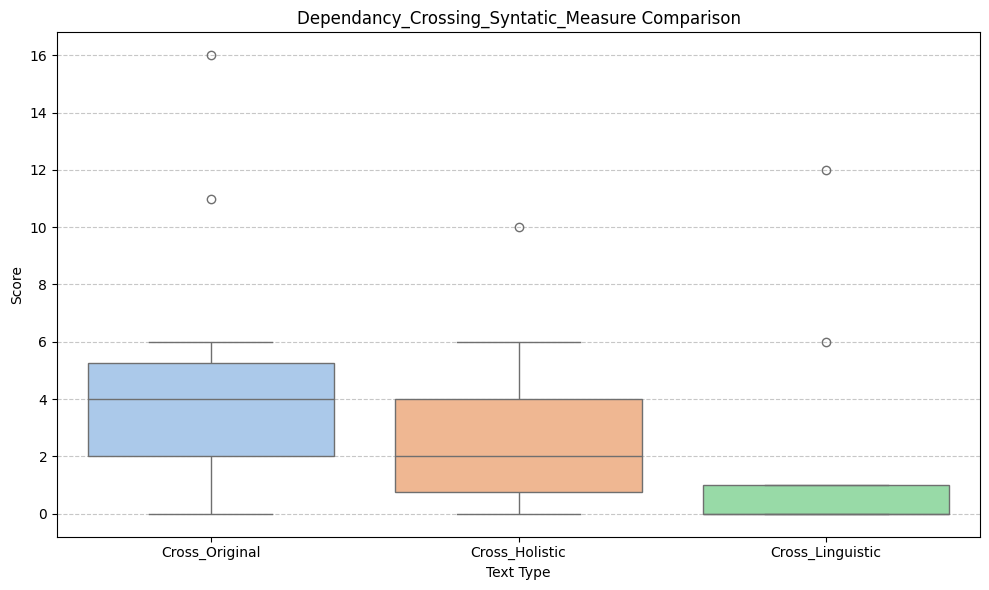

Plot saved to: plots/Dependancy_Crossing_Syntatic_Measure_readability_boxplot.png


In [26]:
def count_dependency_crossings(text):
    doc = nlp(text)
    total_crossings = 0

    for sent in doc.sents:
        arcs = []
        for token in sent:
            if token.i == token.head.i or token.is_punct:
                continue
            head = token.head.i
            dep = token.i
            arcs.append((min(head, dep), max(head, dep)))

        # Count crossings between arcs
        for i in range(len(arcs)):
            for j in range(i + 1, len(arcs)):
                a_start, a_end = arcs[i]
                b_start, b_end = arcs[j]

                if (a_start < b_start < a_end < b_end) or (b_start < a_start < b_end < a_end):
                    total_crossings += 1

    return total_crossings
df["Cross_Original"] = df["Original"].apply(count_dependency_crossings)
df["Cross_Holistic"] = df["Holistic"].apply(count_dependency_crossings)
df["Cross_Linguistic"] = df["Linguistic"].apply(count_dependency_crossings)

print(df[["ID", "Cross_Original", "Cross_Holistic", "Cross_Linguistic"]])
plot_readability_scores(df, "Cross","Dependancy_Crossing_Syntatic_Measure", output_dir="plots")

# Readability Measures

### Wiener Sachtextformel (WSF)

A **readability measure** specifically developed for **German informational texts**, often used to assess how easy a text is to understand in public administration, education, and media.

---

### **How it works:**

The formula uses:

* **Average sentence length** (in words)
* **Average word length** (in syllables)
* **Percentage of polysyllabic words** (words with 3+ syllables)

There are **four versions** of the formula (WSF 1 to 4); the most common is **WSF 4**:

**Formula (WSF 4):**

$$
\text{WSF} = 0.1935 \cdot \text{ASL} + 0.1672 \cdot \text{PLW} + 0.1297 \cdot \text{PSW} - 0.0327
$$

Where:

* ASL = Average Sentence Length
* PLW = Average Word Length (in syllables)
* PSW = Percentage of polysyllabic words

**Scale:**

* **< 4**: very easy
* **4–5**: easy
* **5–6**: medium
* **6–7**: difficult
* **> 7**: very difficult

---

### Example:

Text: `"Das Bundesverfassungsgericht überprüft Gesetze auf Verfassungsmäßigkeit."`

* **Sentences** = 1
* **Words** = 7
* **Syllables per word**: z. B. Bundes-ver-fas-sungs-ge-richt → 6
* **Polysyllabic words** = 2 (`Bundesverfassungsgericht`, `Verfassungsmäßigkeit`)
* **Average Sentence Length** = 7
* **Average Word Length (syllables)** ≈ 2.86
* **Polysyllabic Word %** = 2 / 7 ≈ 28.6%

Insert into formula:

$$
\text{WSF} ≈ 0.1935 \cdot 7 + 0.1672 \cdot 2.86 + 0.1297 \cdot 28.6 - 0.0327 ≈ 1.3545 + 0.4782 + 3.7094 - 0.0327 = \mathbf{5.5094}
$$

---

A **WSF of 5.51** means:

* The text has **medium difficulty** — it might be challenging for readers with low literacy but is manageable for the average adult.


In [20]:
!pip install pyphen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.7 MB/s eta 0:00:00


        ID  WSF_Original  WSF_Holistic  WSF_Linguistic
0   BN_10B          7.72          4.77            4.19
1    BN_1B          6.80          2.84            3.75
2    BN_2B          5.17          3.91            3.94
3    BN_3B          4.97          2.90            2.51
4    BN_4B          5.92          3.95            3.83
5    BN_5B          4.91          4.39            4.38
6    BN_6B          5.54          4.28            4.28
7    BN_7B          5.42          3.13            3.82
8    BN_8B          6.75          4.83            4.31
9    BN_9B          5.29          3.82            2.74
10   K_10B          5.90          4.27            4.12
11    K_1B          7.03          5.27            4.87
12    K_2B          6.31          3.07            3.82
13    K_3B          6.67          3.78            3.87
14    K_4B          6.94          3.38            4.49
15    K_5B          6.40          3.47            4.83
16    K_6B          7.16          4.13            3.95
17    K_7B

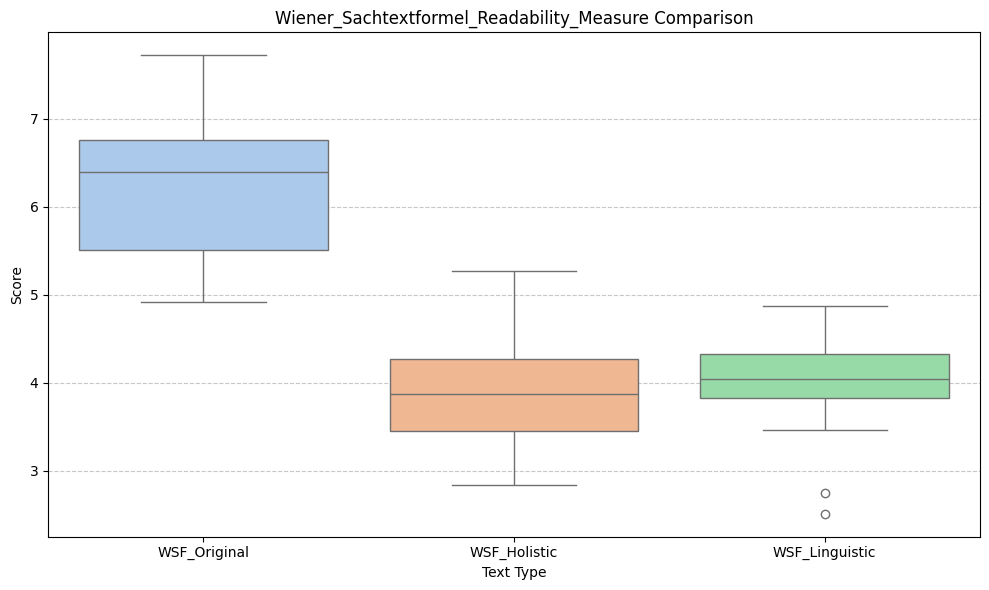

Plot saved to: plots/Wiener_Sachtextformel_Readability_Measure_readability_boxplot.png


In [28]:
import pyphen

dic = pyphen.Pyphen(lang='de_DE')

def count_syllables(word):
    hyphenated = dic.inserted(word)
    return max(1, hyphenated.count('-') + 1)

def wiener_sachtextformel(text):
    doc = nlp(text)
    sentences = list(doc.sents)
    words = [token.text for token in doc if token.is_alpha]

    if not words or not sentences:
        return 0.0

    # Calculations
    asl = len(words) / len(sentences)
    asw = sum(len(word) for word in words) / len(words)

    words_3plus_syllables = [word for word in words if count_syllables(word) >= 3]
    p3 = (len(words_3plus_syllables) / len(words)) * 100

    words_6plus_chars = [word for word in words if len(word) > 6]
    p1 = (len(words_6plus_chars) / len(words)) * 100

    # WSF (Wiener Sachtextformel 4)
    wsf = 0.1935 * asl + 0.1672 * p3 + 0.1297 * asw - 0.0327 * p1 - 0.875
    return round(wsf, 2)

df["WSF_Original"] = df["Original"].apply(wiener_sachtextformel)
df["WSF_Holistic"] = df["Holistic"].apply(wiener_sachtextformel)
df["WSF_Linguistic"] = df["Linguistic"].apply(wiener_sachtextformel)

print(df[["ID", "WSF_Original", "WSF_Holistic", "WSF_Linguistic"]])

plot_readability_scores(df, "WSF","Wiener_Sachtextformel_Readability_Measure", output_dir="plots")

### LIX (Lesbarkeitsindex)

**LIX** (from Swedish: *Läsbarhetsindex*) is a **readability formula** used to evaluate how difficult a text is to read. It is commonly applied to **German, Swedish, and other European languages**.

---

### **How it works:**

The formula considers:

* **Average sentence length** (words per sentence)
* **Percentage of long words** (words with more than 6 letters)

---

**Formula:**

$$
\text{LIX} = \frac{\text{Number of Words}}{\text{Number of Sentences}} + \frac{\text{Number of Long Words} \times 100}{\text{Number of Words}}
$$

---

### Interpretation:

| LIX Score | Reading Level  | Audience                     |
| --------- | -------------- | ---------------------------- |
| 0–24      | Very Easy      | Children                     |
| 25–34     | Easy           | Young students               |
| 35–44     | Medium         | General readers              |
| 45–54     | Difficult      | Advanced texts               |
| 55+       | Very Difficult | Academic, official documents |

---

### Example:

Text: `"Die Bundesregierung diskutiert über Steuererhöhungen für internationale Konzerne."`

* **Words** = 9
* **Sentences** = 1
* **Long words** (>6 letters): 4

  * "Bundesregierung", "diskutiert", "Steuererhöhungen", "internationale"
* Average sentence length = 9 / 1 = 9
* Percentage of long words = 4 / 9 × 100 ≈ 44.44

**LIX:**

$$
\text{LIX} = 9 + 44.44 ≈ \mathbf{53.44}
$$

---

A **LIX of 53.44** means:

* The text is **difficult**, possibly requiring a **higher education level** or advanced German skills to understand easily.


        ID  LIX_Original  LIX_Holistic  LIX_Linguistic
0   BN_10B         55.95         38.05           33.25
1    BN_1B         54.32         29.74           32.32
2    BN_2B         41.66         38.12           35.57
3    BN_3B         40.14         26.55           21.60
4    BN_4B         49.58         36.20           36.29
5    BN_5B         43.90         36.56           37.53
6    BN_6B         46.86         36.38           41.92
7    BN_7B         44.68         32.28           44.62
8    BN_8B         51.69         40.24           39.41
9    BN_9B         48.24         35.41           27.21
10   K_10B         49.35         37.81           36.29
11    K_1B         55.82         43.59           38.68
12    K_2B         48.45         31.96           35.52
13    K_3B         52.41         39.74           35.95
14    K_4B         56.55         35.46           42.37
15    K_5B         49.12         32.78           37.98
16    K_6B         55.26         38.36           38.58
17    K_7B

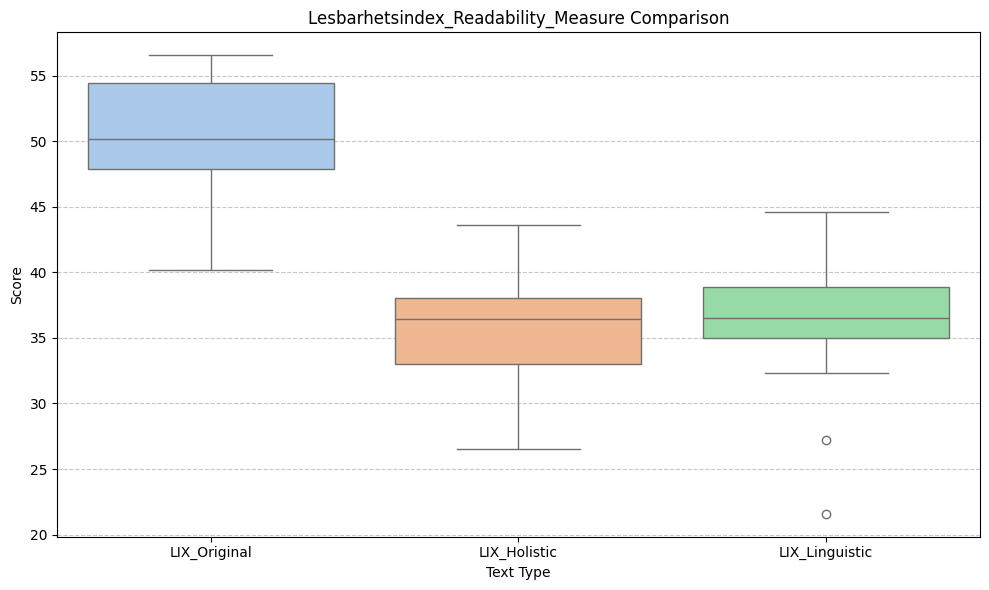

Plot saved to: plots/Lesbarhetsindex_Readability_Measure_readability_boxplot.png


In [29]:

def lix_score(text):
    doc = nlp(text)
    sentences = list(doc.sents)
    words = [token.text for token in doc if token.is_alpha]

    num_sentences = len(sentences)
    num_words = len(words)
    num_long_words = sum(1 for word in words if len(word) >= 7)

    if num_sentences == 0 or num_words == 0:
        return 0.0

    lix = (num_words / num_sentences) + (num_long_words * 100 / num_words)
    return round(lix, 2)
df["LIX_Original"] = df["Original"].apply(lix_score)
df["LIX_Holistic"] = df["Holistic"].apply(lix_score)
df["LIX_Linguistic"] = df["Linguistic"].apply(lix_score)

print(df[["ID", "LIX_Original", "LIX_Holistic", "LIX_Linguistic"]])

plot_readability_scores(df, "LIX","Lesbarhetsindex_Readability_Measure", output_dir="plots")

### Amstad's Flesch Reading Ease (FRE)

An adaptation of the original English Flesch Reading Ease formula designed for the specific characteristics of the German language.

---

### How it works:

Amstad modified the original FRE formula to better fit German syntax, morphology, and compound word structures.

---

### Formula:

Amstad’s adapted FRE for German:

$$
\text{FRE}_{DE} = 180 - \text{ASL} - (58.5 \times \text{ASW})
$$

Where:

* ASL = Average Sentence Length (words per sentence)
* ASW = Average number of syllables per word

---

### Score Interpretation:

| FRE Score | Reading Difficulty | Description                       |
| --------- | ------------------ | --------------------------------- |
| 90–100    | Very easy          | Simple sentences, basic words     |
| 70–89     | Easy               | Clear and simple                  |
| 50–69     | Medium             | Standard prose                    |
| 30–49     | Difficult          | Complex sentence structure        |
| 0–29      | Very difficult     | Academic or bureaucratic language |

---

### Example:

Text: "Die Bundesverfassung überprüft regelmäßig neue Gesetzesvorschläge."

* Sentences: 1
* Words: 7
* Syllables: 19
* ASL = 7
* ASW = 19 ÷ 7 ≈ 2.71

Now compute:

$$
\text{FRE}_{DE} = 180 - 7 - (58.5 \times 2.71) ≈ 180 - 7 - 158.54 = \mathbf{14.46}
$$

---

A FRE score of 14.46 indicates:

→ Very difficult to read
→ Suitable for legal or academic professionals, not for general public communication



        ID  FRE_Original  FRE_Holistic  FRE_Linguistic
0   BN_10B         33.99         66.60           70.84
1    BN_1B         32.31         75.48           68.20
2    BN_2B         54.99         69.05           69.66
3    BN_3B         44.29         72.72           75.87
4    BN_4B         44.27         66.34           64.27
5    BN_5B         52.81         63.10           61.71
6    BN_6B         44.73         62.77           59.23
7    BN_7B         45.31         72.62           62.62
8    BN_8B         42.40         59.86           57.31
9    BN_9B         52.51         67.92           73.13
10   K_10B         40.15         61.81           66.44
11    K_1B         21.20         45.58           52.95
12    K_2B         40.64         71.23           69.38
13    K_3B         33.22         64.48           69.26
14    K_4B         25.23         65.85           56.01
15    K_5B         39.48         67.67           56.68
16    K_6B         35.47         65.52           63.24
17    K_7B

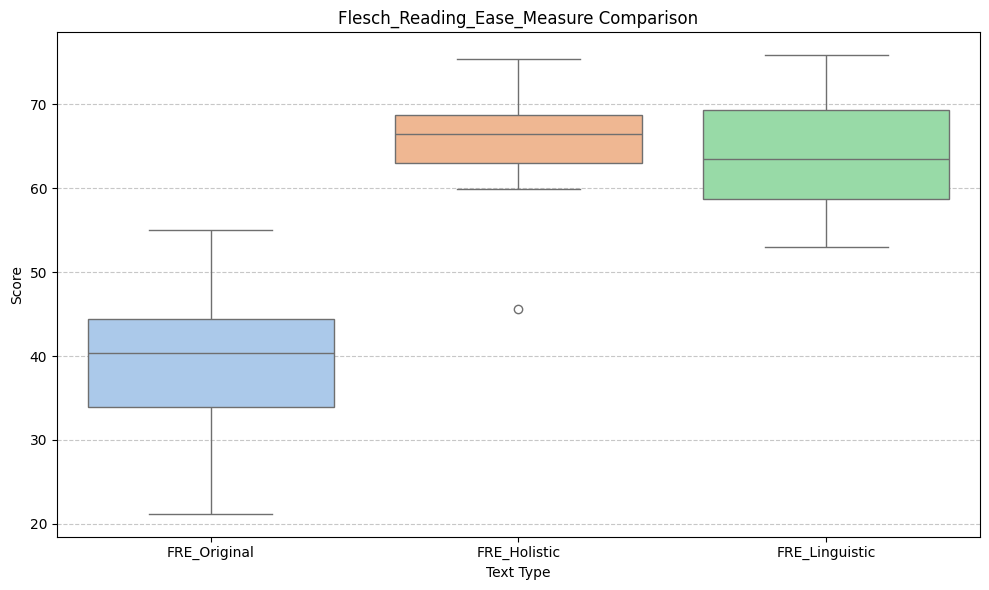

Plot saved to: plots/Flesch_Reading_Ease_Measure_readability_boxplot.png


In [31]:
def count_syllables(word):
    hyphenated = dic.inserted(word)
    return max(1, hyphenated.count('-') + 1)

def flesch_reading_ease_amstad(text):
    doc = nlp(text)
    sentences = list(doc.sents)
    words = [token.text for token in doc if token.is_alpha]

    if not words or not sentences:
        return 0.0

    asl = len(words) / len(sentences)
    total_syllables = sum(count_syllables(word) for word in words)
    asw = total_syllables / len(words)

    fre_de = 180 - asl - (58.5 * asw)
    return round(fre_de, 2)


df["FRE_Original"] = df["Original"].apply(flesch_reading_ease_amstad)
df["FRE_Holistic"] = df["Holistic"].apply(flesch_reading_ease_amstad)
df["FRE_Linguistic"] = df["Linguistic"].apply(flesch_reading_ease_amstad)

print(df[["ID", "FRE_Original", "FRE_Holistic", "FRE_Linguistic"]])
plot_readability_scores(df, "FRE","Flesch_Reading_Ease_Measure", output_dir="plots")

### Gunning Fog Index

The Gunning Fog Index estimates the number of years of formal education a person needs to understand a text on the first reading.

---

### How it works:

It considers:

* Average sentence length (in words)
* Percentage of complex words (words with 3 or more syllables)

—

Note: For German, compound words and inflected forms may increase the count of complex words.

—

### Formula:

$$
\text{Fog Index} = 0.4 \times \left( \frac{\text{Total Words}}{\text{Total Sentences}} + 100 \times \frac{\text{Complex Words}}{\text{Total Words}} \right)
$$

Where:

* Complex words = ≥ 3 syllables (excluding proper nouns, familiar words, and compound prefixes like “un-”, “be-” if handled)

---

### Example:

Text:
"Die Bundesregierung plant umfangreiche Investitionen in erneuerbare Energien."

* Sentences: 1
* Words: 9
* Complex Words (≥ 3 syllables): 4

  * Bundesregierung, umfangreiche, Investitionen, erneuerbare

Now compute:

Average sentence length = 9 / 1 = 9
Complex word percentage = 4 / 9 ≈ 0.444

Apply the formula:

$$
\text{Fog Index} = 0.4 \times (9 + 100 \times 0.444) = 0.4 \times (9 + 44.4) = 0.4 \times 53.4 = \mathbf{21.36}
$$

—

A Fog Index of 21.36 means:

* Very hard to understand
* Suitable for readers with postgraduate education
* Not ideal for general audiences


        ID  Fog_Original  Fog_Holistic  Fog_Linguistic
0   BN_10B         17.59         10.33            8.09
1    BN_1B         17.52          8.26            9.38
2    BN_2B         14.07         10.68            9.96
3    BN_3B         13.72          7.81            7.16
4    BN_4B         15.62         10.19            9.92
5    BN_5B         12.44         10.06           10.22
6    BN_6B         14.18         10.12           10.64
7    BN_7B         14.86          8.48           10.16
8    BN_8B         17.88         12.80           11.59
9    BN_9B         12.29          9.44            6.34
10   K_10B         16.01         11.78           11.16
11    K_1B         17.74         12.79           11.78
12    K_2B         15.80          8.76           10.88
13    K_3B         16.62         10.77           10.12
14    K_4B         17.72          9.65           12.17
15    K_5B         16.10          8.56           11.19
16    K_6B         17.75         10.13           10.00
17    K_7B

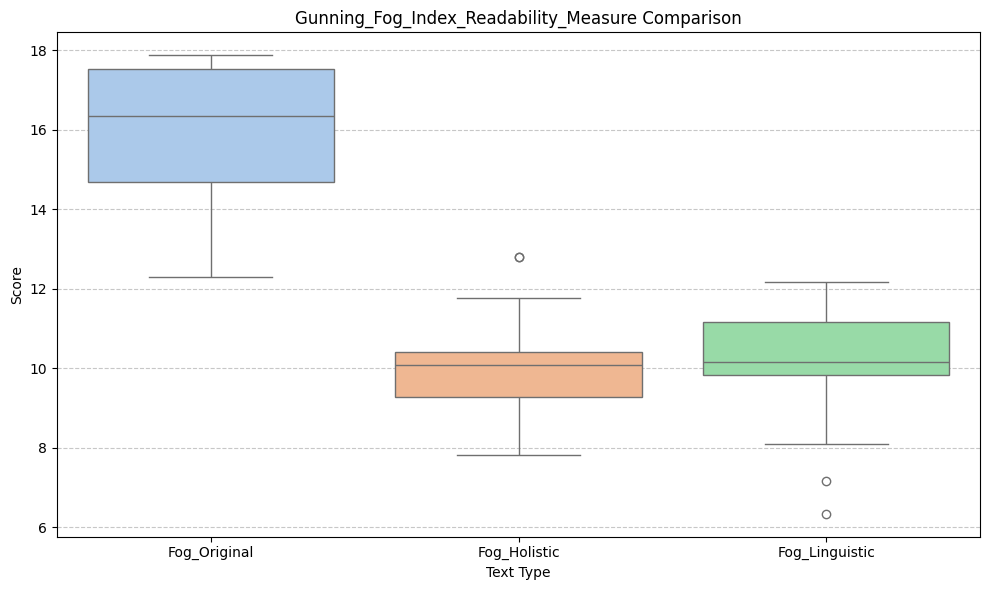

Plot saved to: plots/Gunning_Fog_Index_Readability_Measure_readability_boxplot.png


In [32]:

def count_syllables(word):
    return max(1, dic.inserted(word).count("-") + 1)

def gunning_fog_index(text):
    doc = nlp(text)
    sentences = list(doc.sents)
    words = [token for token in doc if token.is_alpha]

    if not sentences or not words:
        return 0.0

    asl = len(words) / len(sentences)

    # Complex words: 3+ syllables, not stop words, not proper nouns
    complex_words = [
        token for token in words
        if count_syllables(token.text) >= 3 and not token.is_stop and not token.ent_type_
    ]
    percent_complex = (len(complex_words) / len(words)) * 100

    fog = 0.4 * (asl + percent_complex)
    return round(fog, 2)
df["Fog_Original"] = df["Original"].apply(gunning_fog_index)
df["Fog_Holistic"] = df["Holistic"].apply(gunning_fog_index)
df["Fog_Linguistic"] = df["Linguistic"].apply(gunning_fog_index)

print(df[["ID", "Fog_Original", "Fog_Holistic", "Fog_Linguistic"]])
plot_readability_scores(df, "Fog", "Gunning_Fog_Index_Readability_Measure",output_dir="plots")


In [35]:
df.to_csv('Matrix_Scores_GPT4_1.csv', index=False)
#df.to_csv('Matrix_Scores_GPT4_0.csv', index=False)

# Conll Files generation

In [49]:
# Install necessary packages
!pip install --quiet stanza click

# Download German model for stanza
import stanza
stanza.download("de")


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: de (German) ...
INFO:stanza:File exists: /root/stanza_resources/de/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


## Generating conll file,
* _E for Holistic
* _H for linguistic


In [38]:
df

,ID,Original,Holistic,Linguistic,TTR_Original,TTR_Holistic,TTR_Linguistic,LD_Original,LD_Holistic,LD_Linguistic,...,WSF_Linguistic,LIX_Original,LIX_Holistic,LIX_Linguistic,FRE_Original,FRE_Holistic,FRE_Linguistic,Fog_Original,Fog_Holistic,Fog_Linguistic
0,BN_10B,"Eltern, die in der Stadt Hildesheim ihren Wohn...",Hier ist der Text in Deutscher Leichter Sprach...,Hier ist der Text nach Ihren Vorgaben:\r\n\r\n...,0.601,0.473,0.623,0.508,0.489,0.548,...,4.19,55.95,38.05,33.25,33.99,66.60,70.84,17.59,10.33,8.09
1,BN_1B,BAföG (für Schüler)\r\n_______________________...,Hier ist der Text in Leichter Sprache:\r\n\r\n...,"Gern, hier ist der Text nach Ihren Vorgaben re...",0.673,0.485,0.519,0.497,0.446,0.553,...,3.75,54.32,29.74,32.32,32.31,75.48,68.20,17.52,8.26,9.38
2,BN_2B,Fundsachen\r\n________________________________...,Hier ist der Text in Leichter Sprache:\r\n\r\n...,"Gerne, hier die Überarbeitung entsprechend Ihr...",0.545,0.524,0.522,0.494,0.471,0.482,...,3.94,41.66,38.12,35.57,54.99,69.05,69.66,14.07,10.68,9.96
3,BN_3B,"Kindertagesstätte, Platzvermittlung und Voranm...",Hier ist der Text in Leichter Sprache:\r\n\r\n...,"Hier ist der vereinfachte Text, der Ihren Anfo...",0.635,0.514,0.648,0.453,0.368,0.444,...,2.51,40.14,26.55,21.60,44.29,72.72,75.87,13.72,7.81,7.16
4,BN_4B,Allgemeine Informationen \r\nSie sind aus Ihre...,Hier ist der Text in Leichter Sprache:\r\n\r\n...,Gerne! Hier ist der Text nach Ihren Vorgaben (...,0.591,0.486,0.588,0.494,0.446,0.504,...,3.83,49.58,36.20,36.29,44.27,66.34,64.27,15.62,10.19,9.92
5,BN_5B,Elterngeld und Elternzeit\r\n_________________...,Gerne! Hier ist der Text in Deutscher Leichter...,"Gerne, hier ist der Text weiter vereinfacht au...",0.512,0.470,0.629,0.500,0.533,0.551,...,4.38,43.90,36.56,37.53,52.81,63.10,61.71,12.44,10.06,10.22
6,BN_6B,Führungszeugnis \r\n__________________________...,Hier ist der Text in Leichter Sprache:\r\n\r\n...,"Hier ist der Text, nach Ihren Vorgaben (verein...",0.487,0.458,0.686,0.501,0.455,0.533,...,4.28,46.86,36.38,41.92,44.73,62.77,59.23,14.18,10.12,10.64
7,BN_7B,Zweitwohnungssteuer \r\n______________________...,Gerne! Hier ist der Text in Deutscher Leichter...,Das ist eine gute Übersetzung in Leichte Sprac...,0.581,0.479,0.795,0.480,0.530,0.628,...,3.82,44.68,32.28,44.62,45.31,72.62,62.62,14.86,8.48,10.16
8,BN_8B,Anmeldung einer Eheschliessung \r\nDie beabsic...,Hier ist der Text in Leichter Sprache:\r\n\r\n...,"Natürlich! Hier ist der Text, wie von Ihnen ge...",0.547,0.496,0.579,0.519,0.491,0.568,...,4.31,51.69,40.24,39.41,42.40,59.86,57.31,17.88,12.80,11.59
9,BN_9B,Eintragung in das Wählerverzeichnis zur Landta...,Hier ist der Text in Deutscher Leichter Sprach...,Gerne! Hier ist der Text in stark vereinfachte...,0.407,0.369,0.454,0.458,0.428,0.411,...,2.74,48.24,35.41,27.21,52.51,67.92,73.13,12.29,9.44,6.34


In [39]:
import pandas as pd
from pathlib import Path
import stanza
from stanza.utils.conll import CoNLL

# Initialize German NLP pipeline
nlp = stanza.Pipeline(lang="de", processors="tokenize,mwt,pos,lemma,depparse")

# Paths to save files
txt_dir = Path("txt")
conllu_dir = Path("conllu")
txt_dir.mkdir(exist_ok=True)
conllu_dir.mkdir(exist_ok=True)


# Iterate over each row
for _, row in df.iterrows():
    id_val = row["ID"]
    text = row["Original"]
    holistic = row["Holistic"]
    linguistic = row["Linguistic"]

    id_base = id_val.removesuffix("B")
    text_filename = f"{id_val}.txt"
    holistic_filename = f"{id_base}E.txt"
    linguistic_filename = f"{id_base}H.txt"

    # Save text versions
    (txt_dir / text_filename).write_text(text, encoding="utf-8")
    (txt_dir / holistic_filename).write_text(holistic, encoding="utf-8")
    (txt_dir / linguistic_filename).write_text(linguistic, encoding="utf-8")

    # Process with Stanza and save as CoNLL
    for fname in [text_filename, holistic_filename, linguistic_filename]:
        txt_path = txt_dir / fname
        conllu_path = conllu_dir / fname.replace(".txt", ".conllu")

        input_text = txt_path.read_text(encoding="utf-8")
        doc = nlp(input_text)
        CoNLL.write_doc2conll(doc, conllu_path)


print("✅ All files saved with B replaced at the end and placed in correct folders.")


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: de (German):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


✅ All files saved with B replaced at the end and placed in correct folders.


In [40]:
import shutil
from google.colab import files

# Zip the folder (e.g., my_folder becomes my_folder.zip)
shutil.make_archive('conllu', 'zip', 'conllu')

# Download the zip file
files.download('conllu.zip')


# Zip the folder (e.g., my_folder becomes my_folder.zip)
shutil.make_archive('txt', 'zip', 'txt')

# Download the zip file
files.download('txt.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>